# User reviews (EDA)

The following notebook shows an exploratory data analysis using the data from the user reviews file (after subjecting such file to some transformations and a cleaning process). 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from etl_functions import general_information

In [2]:
df=pd.read_csv("cleaned_data/reviews_cleaned.csv")

In [3]:
df.head(5)

,item_id,recommend,review,year,user_id,language,sentiment_analysis
0,1250,True,simple yet with great replayability in my opin...,2011.0,76561197970982479,en,2
1,251610,True,i know what you think when you see this title ...,2014.0,js41637,en,2
2,248820,True,a suitably punishing roguelike platformer win...,NaN,evcentric,en,2
3,250320,True,this game is so fun the fight sequences have b...,2013.0,doctr,en,2
4,211420,True,git gud,2014.0,maplemage,ca,1


In [4]:
df["year"] = df["year"].astype("Int64")

In [5]:
df.head(5)

,item_id,recommend,review,year,user_id,language,sentiment_analysis
0,1250,True,simple yet with great replayability in my opin...,2011,76561197970982479,en,2
1,251610,True,i know what you think when you see this title ...,2014,js41637,en,2
2,248820,True,a suitably punishing roguelike platformer win...,<NA>,evcentric,en,2
3,250320,True,this game is so fun the fight sequences have b...,2013,doctr,en,2
4,211420,True,git gud,2014,maplemage,ca,1


In [6]:
general_information(df)

,column,data_type,missing_values,missing_values_percentage
0,item_id,<class 'str'>,0,0.00
1,recommend,<class 'str'>,0,0.00
2,review,<class 'str'>,840,0.01
3,year,<class 'str'>,9915,0.17
4,user_id,<class 'str'>,771,0.01
5,language,<class 'str'>,573,0.01
6,sentiment_analysis,<class 'str'>,0,0.00


In [7]:
df["language"].value_counts()

language
en       44882
pt        2143
es        1247
de        1129
so        1001
af         738
th         704
tl         590
cy         428
da         402
no         368
nl         303
ca         251
it         249
ro         242
id         242
pl         237
ko         233
fr         224
ru         213
zh-cn      206
sw         178
et         175
tr         162
hr         138
sl         126
vi         124
fi         104
sq         103
hu          96
sv          80
sk          75
cs          41
lt          37
lv          36
ja          36
bg          20
uk          13
zh-tw        9
mk           7
ar           2
ta           1
Name: count, dtype: int64

In [8]:
df_en=df[df["language"]=="en"]

In [9]:
df_en.head(5)

,item_id,recommend,review,year,user_id,language,sentiment_analysis
0,1250,True,simple yet with great replayability in my opin...,2011,76561197970982479,en,2
1,251610,True,i know what you think when you see this title ...,2014,js41637,en,2
2,248820,True,a suitably punishing roguelike platformer win...,<NA>,evcentric,en,2
3,250320,True,this game is so fun the fight sequences have b...,2013,doctr,en,2
5,249130,True,this game is marvellous,2014,Wackky,en,1


In [10]:
general_information(df_en)

,column,data_type,missing_values,missing_values_percentage
0,item_id,<class 'str'>,0,0.00
1,recommend,<class 'str'>,0,0.00
2,review,<class 'str'>,0,0.00
3,year,<class 'str'>,7832,0.17
4,user_id,<class 'str'>,627,0.01
5,language,<class 'str'>,0,0.00
6,sentiment_analysis,<class 'str'>,0,0.00


In [11]:
df_en.drop(columns={"language","review"},inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_5452\3786622872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en.drop(columns={"language","review"},inplace=True)


In [12]:
df_en.head(5)

,item_id,recommend,year,user_id,sentiment_analysis
0,1250,True,2011,76561197970982479,2
1,251610,True,2014,js41637,2
2,248820,True,<NA>,evcentric,2
3,250320,True,2013,doctr,2
5,249130,True,2014,Wackky,1


In [13]:
sentiments_df=df_en["sentiment_analysis"].value_counts().reset_index()

In [14]:
sentiments_df

,sentiment_analysis,count
0,2,31783
1,0,8363
2,1,4736


C:\Users\diego\AppData\Local\Temp\ipykernel_5452\3029717356.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0, 0.5, 'Count')

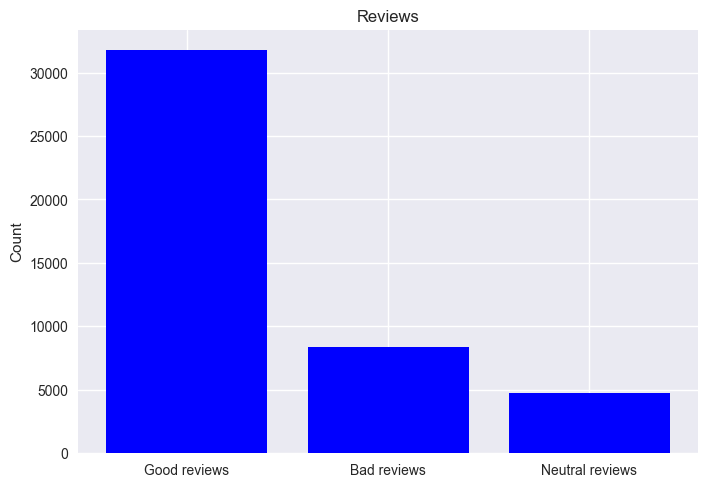

In [15]:
#Reviews count
plt.style.use("seaborn")
plt.bar(["Good reviews","Bad reviews","Neutral reviews"],[sentiments_df.loc[0,"count"],sentiments_df.loc[1,"count"],sentiments_df.loc[2,"count"]],color="blue")
plt.title("Reviews")
plt.ylabel("Count")

C:\Users\diego\AppData\Local\Temp\ipykernel_5452\2067964445.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0, 0.5, 'Count')

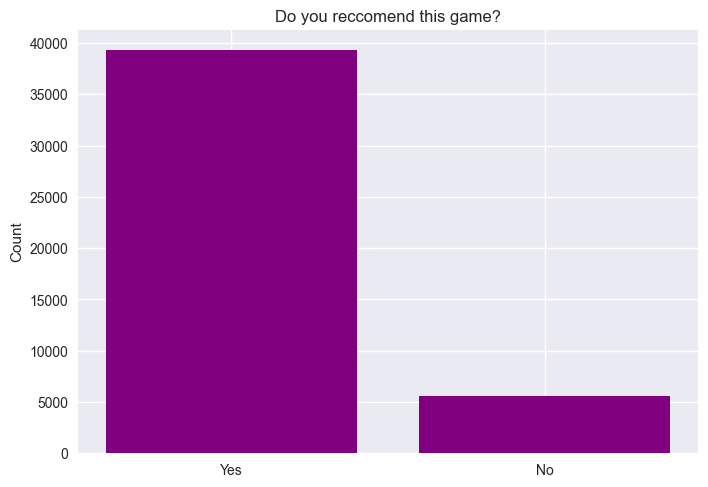

In [16]:
#Recommendation count
plt.style.use("seaborn")
plt.bar(["Yes","No"],[df_en["recommend"].sum(),len(df_en)-df_en["recommend"].sum()],color="purple")
plt.title("Do you reccomend this game?")
plt.ylabel("Count")

In [17]:
df_wyear=df_en[df_en["year"]!="<NA>"]

In [18]:
df_wyear["year"].value_counts()

year
2014    16419
2015    14224
2013     4979
2012      933
2011      441
2010       54
Name: count, dtype: Int64

In [19]:
df_wyear.groupby("year")["sentiment_analysis"].value_counts()

year  sentiment_analysis
2010  2                        41
      0                         7
      1                         6
2011  2                       350
      0                        52
      1                        39
2012  2                       697
      0                       129
      1                       107
2013  2                      3890
      0                       657
      1                       432
2014  2                     11950
      0                      2824
      1                      1645
2015  2                      9594
      0                      2977
      1                      1653
Name: count, dtype: int64

C:\Users\diego\AppData\Local\Temp\ipykernel_5452\1115609090.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


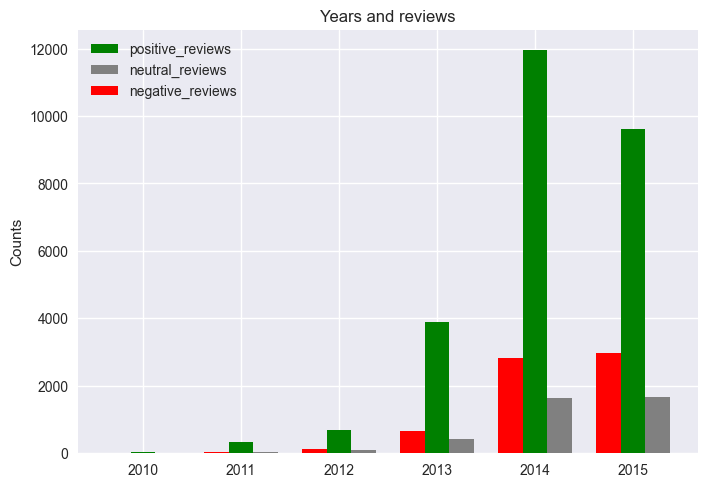

In [20]:
#Years and reviews count
plt.style.use("seaborn")

years=np.arange(2010,2016)
width=0.25

positive_reviews=[41,348,697,3883,11958,9609]
negative_reviews=[7,51,128,658,2818,2970]
neutral_reviews=[6,38,104,432,1637,1656]



plt.bar(years,positive_reviews,width=width,label="positive_reviews",color="green")
plt.bar(years+width,neutral_reviews,width=width,label="neutral_reviews",color="grey")
plt.bar(years-width,negative_reviews,width=width,label="negative_reviews",color="red")

plt.title("Years and reviews")
plt.ylabel("Counts")
plt.legend()